### IMPORTS

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split  , KFold
from sklearn.metrics import accuracy_score , plot_roc_curve, f1_score ,confusion_matrix

from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold


### DATASET AND DIRECTORY PATH

In [2]:
DIR_PATH = os.path.abspath("")
DATASET_PATH = os.path.join(DIR_PATH,"wdbc.data")

### K FOLD = 10

In [9]:
kf = KFold(n_splits=10)

### READ DATASET AND SEPARATE LABELS

In [13]:
df = pd.read_csv(DATASET_PATH,header=None)
del df[0]
y = df[1].values
del df[1]
X = df
X = X.values
X


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

### SPLTT DATASET IN TRAIN TEST (70:30)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


### Apply MLPClassifier on Train using KFold

In [16]:
parameters = []
accuracy   = []
for i in range (3,7):
  for j in range(1,11):
    j = j / 10 
    clf = MLPClassifier(hidden_layer_sizes = (i,), activation='logistic', alpha = j, max_iter=2000)
    for train_indices, test_indices in kf.split(X_train):
      clf.fit(X_train[train_indices], y_train[train_indices])
      parameters.append((clf.score(X_train[test_indices],y_train[test_indices]),j,i))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### FINDING MAX ACCURACY PARAMS

In [22]:
max_parameters = (0,0,0)
for (acc , alpha , neurons) in parameters:
  if max_parameters[0]  <= acc:
    max_parameters = (acc , alpha , neurons)

print("ACCURACY : {0}\nLEARNING RATE : {1}\nNEURONS : {2} ".format(max_parameters[0],max_parameters[1],max_parameters[2]))

ACCURACY : 1.0
LEARNING RATE : 0.3
NEURONS : 6 


### USING TEST DATA , F1 Score , PLOT

F1 SCORE : 0.9162301691977239


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'neg') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


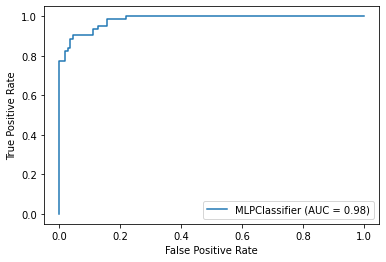

In [27]:

clf = MLPClassifier(solver ='adam',hidden_layer_sizes = (max_parameters[2],), activation='logistic', alpha = max_parameters[1], max_iter=2000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

f1 =  f1_score(y_test, y_pred,average="macro", pos_label="neg")
print("F1 SCORE : {0}".format(f1))

plot_roc_curve(clf, X_test, y_test)
plt.show()